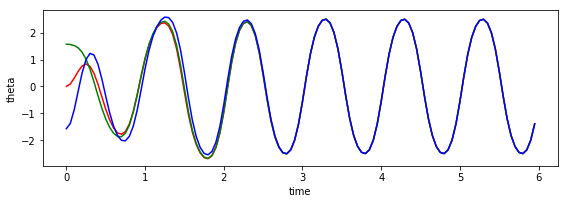

In [241]:
#Included are the solutions of the following problems from chapter 12:
#12.6, 12.7, 12.8, 12.9, 12.10, 12.14, 12.15, 12.21, 12.23
#The tenth problem is in the other file (writtensolutions.pdf)
# Problem 12.6,
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    theta, omega = y      # unpack current values of y
    Beta, gamma, Omeganat, Omega = params  # unpack parameters
    derivs = [omega,      # list of dy/dt=f functions
             -2*Beta*omega -(Omeganat**2)*np.sin(theta)+(Omeganat**2)*gamma*np.cos(Omega*t)]
    return derivs

# Parameters
gamma = 0.9     # forcing amplitude
Omega = 2.0*np.pi   # drive frequency
Omeganat = 1.5*Omega #natural frequency
Beta = Omeganat/4   # quality factor (inverse damping)


# Initial values
theta0 = 0.0     # initial angular displacement
omega0 = 0.0     # initial angular velocity

# Bundle parameters for ODE solver
params = [Beta,gamma,Omeganat, Omega]

# Bundle initial conditions for ODE solver
y0 = [theta0, omega0]

# Make time array for solution
tStop = 6.0
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))
theta0 = np.pi/2.0
y0 = [theta0, omega0]
psoln2 = odeint(f, y0, t, args=(params,))
theta0 = -np.pi/2.0
y0 = [theta0, omega0]
psoln3 = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0],'r')# theta 0
ax1.plot(t, psoln2[:,0],'g')# theta pi/2
ax1.plot(t, psoln3[:,0],'b')# theta -pi/2

ax1.set_xlabel('time')
ax1.set_ylabel('theta')


plt.tight_layout()
plt.show()

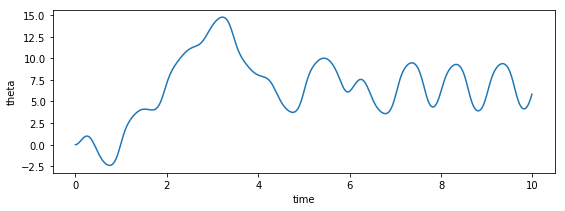

In [250]:
#Problem 12.7
gamma = 1.06 # set to .06
params = [Beta,gamma,Omeganat, Omega]

tStop = 10.0
t = np.arange(0., tStop, tInc)
psoln = odeint(f, y0, t, args=(params,))

#plot the graph
plt.figure(figsize=(9,3))
plt.plot(t, psoln[:,0])
plt.xlabel('time')
plt.ylabel('theta')
plt.show()
#This is clearly approaching an attractor where the motion becomes periodic and steady.

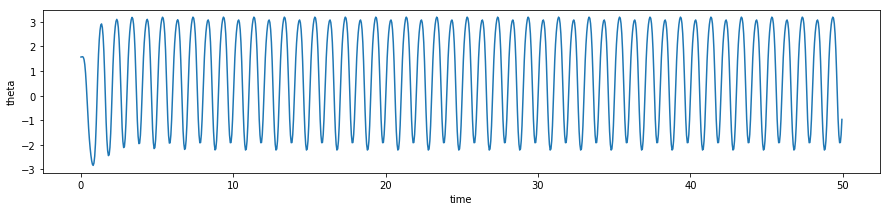

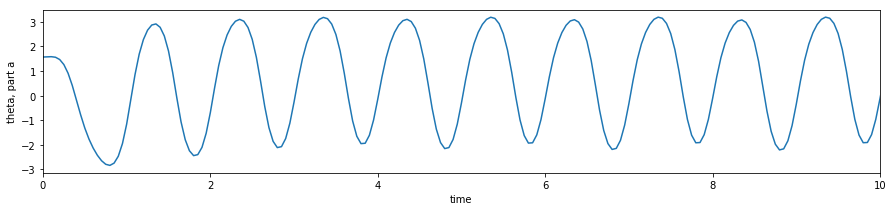

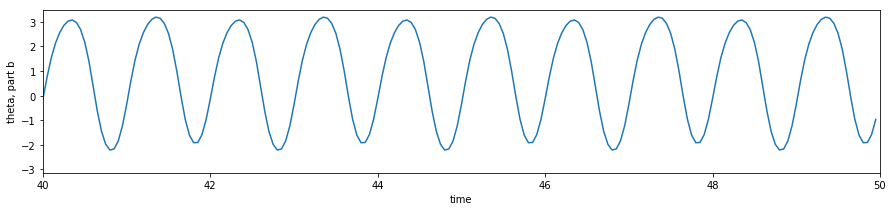

In [242]:
#Problem 12.8
#set gamma = 1.073, drive frequency 2pi, natural requency 1.5 driving
#damping constant natural/4 theta(0) = pi/2
#a) solve for 0<t<50, then plot first ten cycles
gamma = 1.073 # set to .06
theta0 = np.pi/2.0
params = [Beta,gamma,Omeganat, Omega]
y0 = [theta0, omega0]
tStop = 50.0
t = np.arange(0., tStop, tInc)
psoln4 = odeint(f, y0, t, args=(params,))

#plot the whole graph, not part of problem but just to see.
plt.figure(figsize=(15,3))
plt.plot(t, psoln4[:,0])
plt.xlabel('time')
plt.ylabel('theta')
plt.show()

#a) plot from zero to 10. Its kind of wierd not so periodic motion.
plt.figure(figsize=(15,3))
plt.xlim([0,10])
plt.plot(t, psoln4[:,0])
plt.xlabel('time')
plt.ylabel('theta, part a')
plt.show()
#b) plot from 40 to 50. Much more steady. Period is 2.
plt.figure(figsize=(15,3))
plt.xlim([40,50])
plt.plot(t, psoln4[:,0])
plt.xlabel('time')
plt.ylabel('theta, part b')
plt.show()



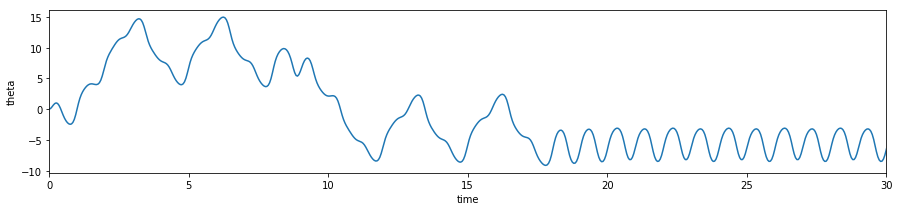

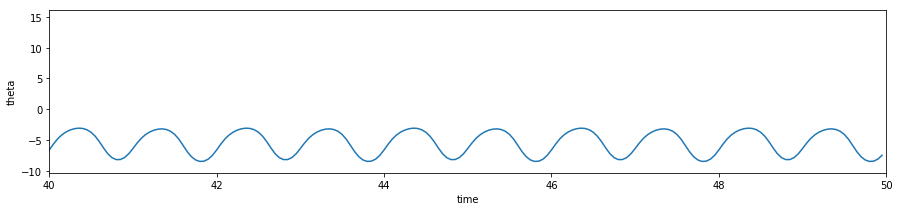

In [243]:
#12.9
#do the same thing as 12.8 but with theta(0) =0
gamma = 1.073
theta0 = 0.0
params = [Beta,gamma,Omeganat, Omega]
y0 = [theta0, omega0]
tStop = 50.0
t = np.arange(0., tStop, tInc)
psoln4 = odeint(f, y0, t, args=(params,))

#plot from t= 0 to 30
plt.figure(figsize=(15,3))
plt.plot(t, psoln4[:,0])
plt.xlim([0,30])
plt.xlabel('time')
plt.ylabel('theta')
plt.show()
#plot from t= 40 to 50
plt.figure(figsize=(15,3))
plt.plot(t, psoln4[:,0])
plt.xlim([40,50])
plt.xlabel('time')
plt.ylabel('theta')
plt.show()
#looks like period 1


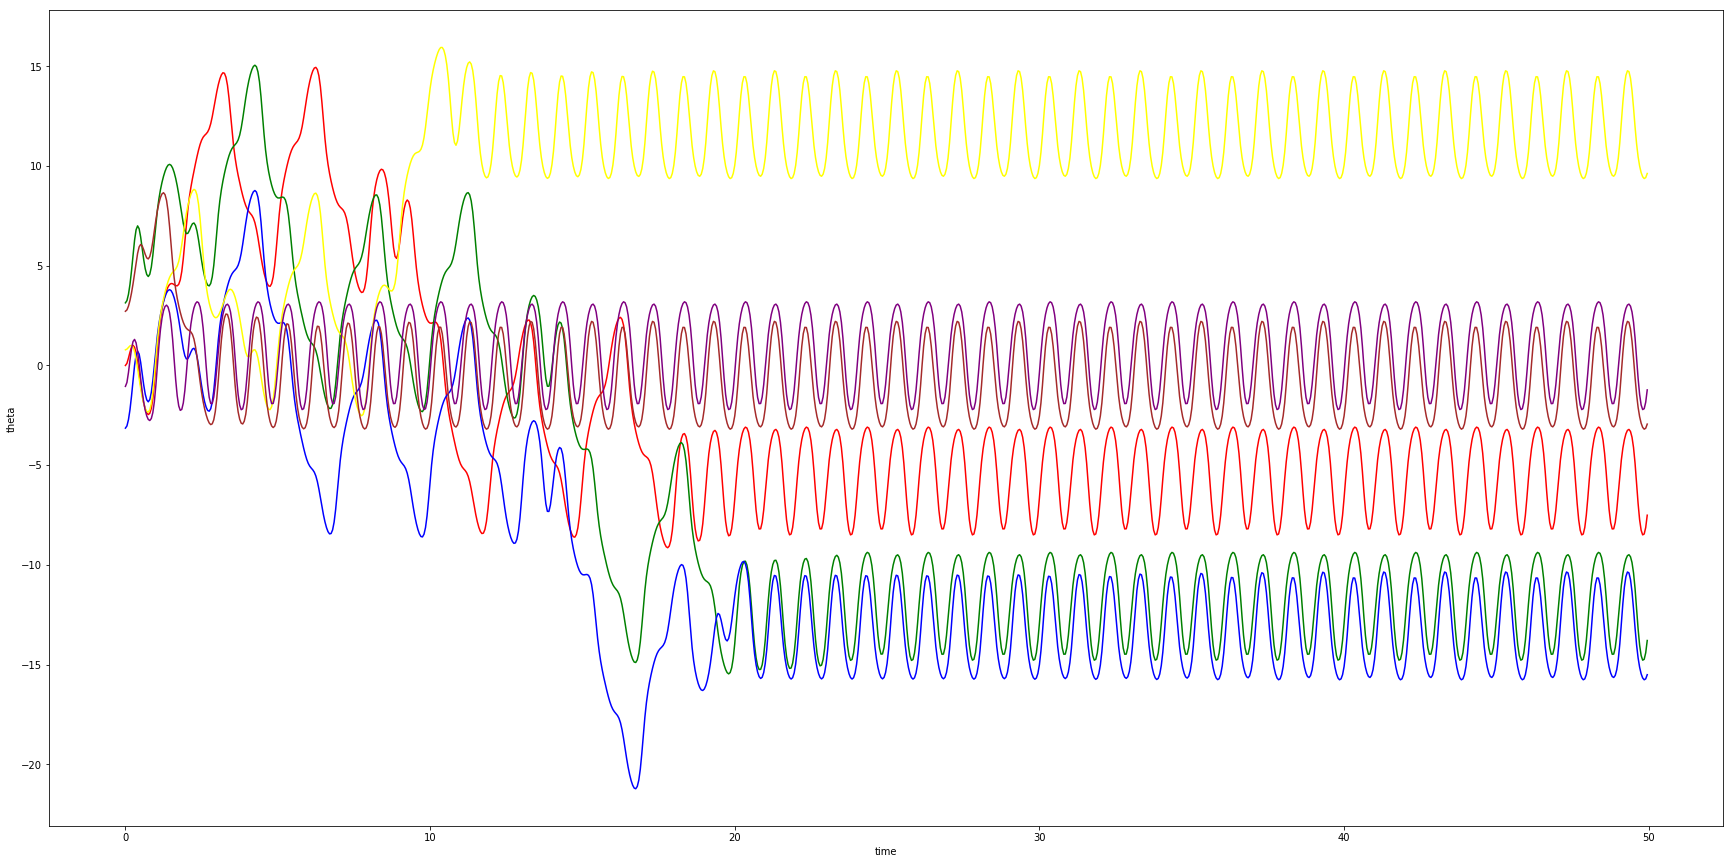

In [244]:
#12.10
#Explore the behavior of DDP for various initial conditions. for theta(0) between -pi and pi using the same
#values for everything else as 12.8

# 6 graphs in 1...
psoln = odeint(f, y0, t, args=(params,))
theta0 = np.pi
y0 = [theta0, omega0]
psoln2 = odeint(f, y0, t, args=(params,))
theta0 = -np.pi
y0 = [theta0, omega0]
psoln3 = odeint(f, y0, t, args=(params,))
theta0 = np.pi/4
y0 = [theta0, omega0]
psoln4 = odeint(f, y0, t, args=(params,))
theta0 = -np.pi/3
y0 = [theta0, omega0]
psoln5 = odeint(f, y0, t, args=(params,))
theta0 = np.e
y0 = [theta0, omega0]
psoln6 = odeint(f, y0, t, args=(params,))


# Plot theta as a function of time
plt.figure(figsize=(30,15))

plt.plot(t, psoln[:,0],'red')# theta 0
plt.plot(t, psoln2[:,0],'green')# theta(0) =pi
plt.plot(t, psoln3[:,0],'blue')# theta(0) =-pi
plt.plot(t, psoln4[:,0],'yellow')# theta(0) =pi/=
plt.plot(t, psoln5[:,0],'purple')# theta(0) =pi/3
plt.plot(t, psoln6[:,0],'brown')# theta(0) =e



plt.xlabel('time')
plt.ylabel('theta')
plt.show()
#all have same period long term.

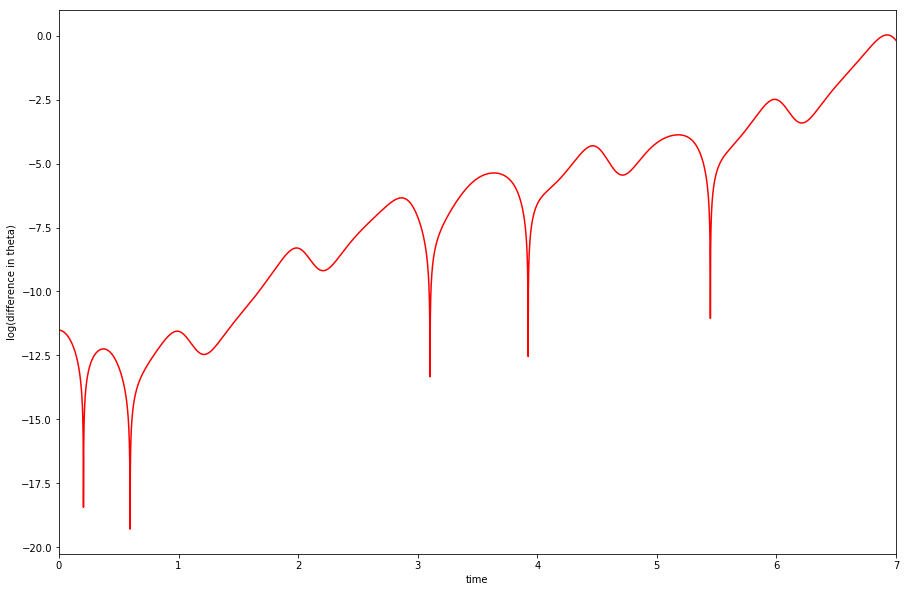

In [245]:
#12.14
#solve for gamma = 1.084 drive freqeuncy 2pi and natural frequency 1.5*drive frequency
#damping constant natural frequncy/4. Theta(0) and its derivative both zero. solve from 0<t<7. then set theta(0)
#to 0.00001 and solve for solution 2 . find dTheta and plot log(dtheta)
gamma = 1.084
theta0 = 0.0
params = [Beta,gamma,Omeganat, Omega]
y0 = [theta0, omega0]
tStop = 7.0
tInc = 0.001
t = np.arange(0., tStop, tInc)
psoln = odeint(f, y0, t, args=(params,))
theta0 = 0.00001
params = [Beta,gamma,Omeganat, Omega]
y0 = [theta0, omega0]
psoln2 = odeint(f, y0, t, args=(params,))


#plot from t= 0 to 30
plt.figure(figsize=(15,10))
plt.plot(t, np.log(np.abs(psoln2[:,0]-psoln[:,0])),'red')
plt.xlim([0,7])
plt.xlabel('time')
plt.ylabel('log(difference in theta)')
plt.show()
#This plot shows that the difference in theta is growing roughly exponentially, as the log of it is linear with positive slope.
#The differnce in initial conditions for chaotic systems grows exponentially, so this must be chaotic



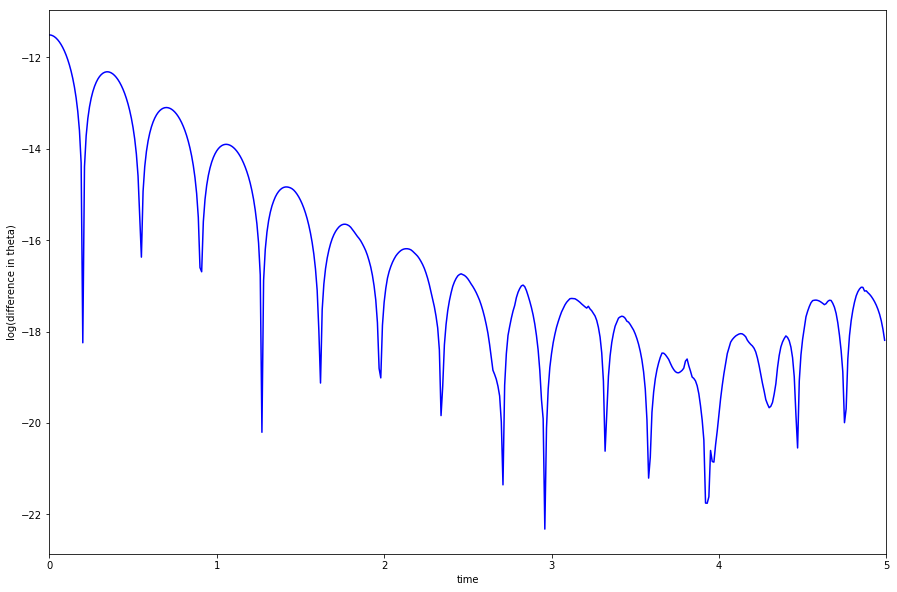

In [246]:
#12.15 Solve for drive strength 0.3, with all the other parameters the same and then graph the difference curve
#graph the log(abs(difference))
gamma = 0.3
theta0 = 0.0
params = [Beta,gamma,Omeganat, Omega]
y0 = [theta0, omega0]
tStop = 5
tInc = 0.01
t = np.arange(0., tStop, tInc)
psoln = odeint(f, y0, t, args=(params,))
theta0 = 0.00001
params = [Beta,gamma,Omeganat, Omega]
y0 = [theta0, omega0]
psoln2 = odeint(f, y0, t, args=(params,))


#plot from t= 0 to 30
plt.figure(figsize=(15,10))
plt.plot(t, np.log(np.abs(psoln2[:,0]-psoln[:,0])),'blue')
plt.xlim([0,5])
plt.xlabel('time')
plt.ylabel('log(difference in theta)')
plt.show()

#This has a negative slope that is roughly linear, corresponding with an exponential decay. This means that
#both initial conditions approach a common attractor. It seems to bottom out only because of the precision
#of the simulation.


In [247]:
#12.21 Cosine attractor
#Trying this for several initial points
initialpoint = [0.0,0.5,np.pi,2] # the initial points, there are 4
pointcollection = np.zeros((30,4))
print(initialpoint)
for x in  range(30):
    initialpoint = np.cos(initialpoint)
    pointcollection[x,:]= initialpoint
#This seems to approach the value of 0.7390 regardless of intial conditions
print(pointcollection)

[0.0, 0.5, 3.141592653589793, 2]
[[ 1.          0.87758256 -1.         -0.41614684]
 [ 0.54030231  0.63901249  0.54030231  0.91465333]
 [ 0.85755322  0.8026851   0.85755322  0.6100653 ]
 [ 0.65428979  0.69477803  0.65428979  0.81961061]
 [ 0.79348036  0.76819583  0.79348036  0.68250586]
 [ 0.70136877  0.71916545  0.70136877  0.77599461]
 [ 0.76395968  0.75235576  0.76395968  0.71372473]
 [ 0.72210243  0.73008106  0.72210243  0.75592871]
 [ 0.75041776  0.74512034  0.75041776  0.72763479]
 [ 0.73140404  0.73500631  0.73140404  0.7467496 ]
 [ 0.74423735  0.74182652  0.74423735  0.7339006 ]
 [ 0.73560474  0.73723573  0.73560474  0.74256755]
 [ 0.74142509  0.74032965  0.74142509  0.73673486]
 [ 0.73750689  0.73824624  0.73750689  0.74066626]
 [ 0.74014734  0.73964996  0.74014734  0.73801914]
 [ 0.7383692   0.73870454  0.7383692   0.73980278]
 [ 0.7395672   0.73934145  0.7395672   0.73860153]
 [ 0.73876032  0.73891245  0.73876032  0.73941081]
 [ 0.73930389  0.73920144  0.73930389  0.73886572

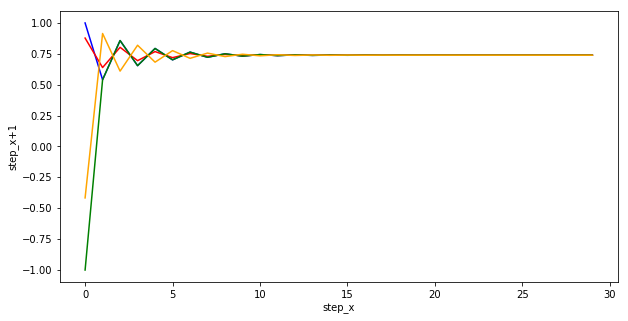

In [248]:
#Plotting the various initial conditions
plt.figure(figsize=(10,5))
plt.plot(pointcollection[:,0],'blue')
plt.plot(pointcollection[:,1],'red')
plt.plot(pointcollection[:,2],'green')
plt.plot(pointcollection[:,3],'orange')
plt.xlabel('step_x')
plt.ylabel('step_x+1')
plt.show()
#These trajectories are clearly approaching a common value, as said earlier. 
#It is 0.73908. Looking at point 30 for all trajectories , the slope is  zero. 
#Therefore, it is a stable.
#However, at point 0, everything has a very large slope (>0) so they are unstable.




[0.1, 0.2, 0.65, 0.8]


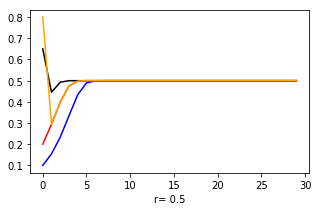

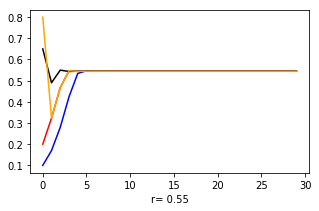

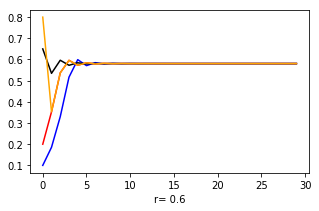

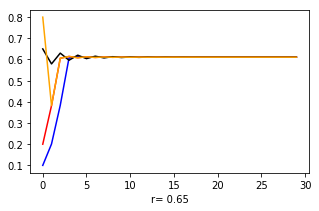

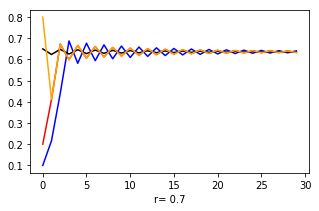

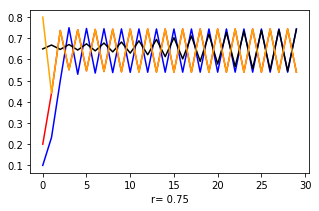

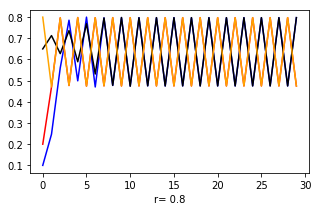

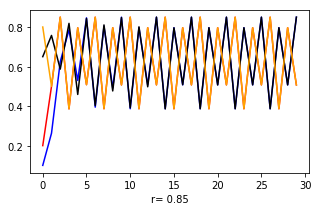

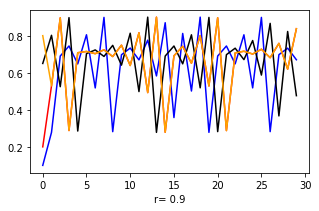

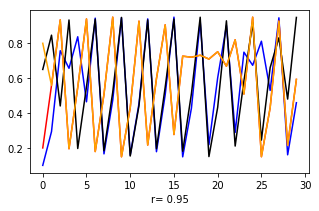

In [249]:
#12.23 Sine map. make a sine map similar to the one I just did, but have an r and pi term
#a) show that map has either one or two fixed points, depending on r

initialpoint = [0.1,0.2,0.65,0.8] # the initial points, there are 4, should be 0<x<1
# also in between 1 and 0
pointcollection = np.zeros((30,4))
pointcollection[0,:] = initialpoint
print(initialpoint)
for r in range (10,20): # iterate over several r
    for x in  range(29):
        pointcollection[x+1,:]= (r/20)*np.sin(np.pi*pointcollection[x,:])
    
    plt.figure(figsize=(5,3))

    plt.plot(pointcollection[:,0],'blue')
    plt.plot(pointcollection[:,1],'red')
    plt.plot(pointcollection[:,2],'black')
    plt.plot(pointcollection[:,3],'orange')
    plt.xlabel('r= '+str(r/20))
    plt.show()
    
#b)Over these graphs it seems that for r <0.75 there is one clear attractor
#but for r>0.75 there are two.
#c) The point at which the second point becomes unstable is 0.9

    
